In [1]:
# import libary
from __future__ import print_function
from math import log10
%pylab
%matplotlib inline
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from data import get_training_set, get_test_set
from torch.nn.modules.module import _addindent

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['log10']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
cuda =True
weight='weight1.pth'
torch.cuda.manual_seed(random.randint(1,1000))
test_set = get_test_set(2,"BSDS300")
testing_data_loader = DataLoader(dataset=test_set, num_workers=8, batch_size=100, shuffle=False)

model =torch.load(weight)
criterion = nn.MSELoss()

In [3]:

if cuda:
    criterion = criterion.cuda()

def test(epoch):
    avg_psnr = 0
    for batch in testing_data_loader:
        input, target = Variable(batch[0]), Variable(batch[1])
        if cuda:
            input = input.cuda()
            target = target.cuda()

        prediction = model(input)
        mse = criterion(prediction, target)
        psnr = 10 * log10(1 / mse.data[0])
        avg_psnr += psnr
    print("===> Avg. PSNR: {:.4f} dB".format(avg_psnr / len(testing_data_loader)))



for epoch in range(1,10):
    test(epoch)

===> Avg. PSNR: 27.6249 dB
===> Avg. PSNR: 27.6249 dB
===> Avg. PSNR: 27.6249 dB
===> Avg. PSNR: 27.6249 dB
===> Avg. PSNR: 27.6249 dB
===> Avg. PSNR: 27.6249 dB
===> Avg. PSNR: 27.6249 dB
===> Avg. PSNR: 27.6249 dB
===> Avg. PSNR: 27.6249 dB


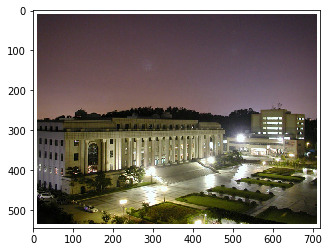

In [11]:
from PIL import Image
from torchvision.transforms import ToTensor
img = Image.open('test.jpg').convert('YCbCr')

y, cb, cr = img.split()

model = torch.load(weight)
input = Variable(ToTensor()(y)).view(1, -1, y.size[1], y.size[0])

if cuda:
    model = model.cuda()
    input = input.cuda()

out = model(input)
out = out.cpu()
out_img_y = out.data[0].numpy()
out_img_y *= 255.0
out_img_y = out_img_y.clip(0, 255)
out_img_y = Image.fromarray(np.uint8(out_img_y[0]), mode='L')

out_img_cb = cb.resize(out_img_y.size, Image.BICUBIC)
out_img_cr = cr.resize(out_img_y.size, Image.BICUBIC)
out_img = Image.merge('YCbCr', [out_img_y, out_img_cb, out_img_cr]).convert('RGB')
out_img.save('result.jpg')
plt.imshow(img)


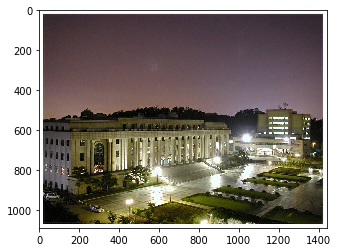

In [10]:
plt.imshow(out_img)